# Pymaceuticals Inc.
---

### Analysis

- The ratio of male to female mice is fairly balanced as shown in the pie chart based on sex, denoting that the experiment drew its sample randomly without bias toward either sex.
-Capomulin and Ramicane had the highest number of test subjects-over 200- while the other drug regimens used a similar number across the chart of less than 200. They also had lower mean tumor volumes(at near 40 mm3) compared to Infubinol and Ceftamin which had mean tumor volumes close to 60 mm3. This shows a greater average efficacy of those two drug regimens compared to the other two in the same list.
- The regression line, charting the relationship average tumor size and mice weight, denotes a positive correlation between the mouse's weight and the tumor volume in the Capomulin drug regimen.
- There appeared a lone outlier in the Infubinol treatment set.
- For one of the mice treated with Capomulin, we see a decline in tumor mass over time, thus indicating efficacy of this treatment course on this single animal. However, it cannot be concluded that all mice undergoing this treatment regimen responded the same way to it.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata, how='left', on=['Mouse ID', 'Mouse ID'])

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [4]:
# Checking the number of mice.
mouse_num = len(combined_df['Mouse ID'].unique())
mouse_num

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_id = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicates_id

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_id = combined_df.loc[combined_df['Mouse ID'] == 'g989', :]
duplicates_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'].isin(duplicates_id) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_df['Mouse ID'].nunique()
clean_mouse_count

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_vol = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_vol = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
volume_var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
volume_std_dev = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
volume_std_err = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean_vol,
    'Median Tumor Volume': median_vol,
    'Tumor Variance Volume': volume_var,
    'Tumor Volume Std. Dev.': volume_std_dev,
    'Tumor Volume Std. Err.': volume_std_err
})
statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Variance Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats_df = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
agg_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

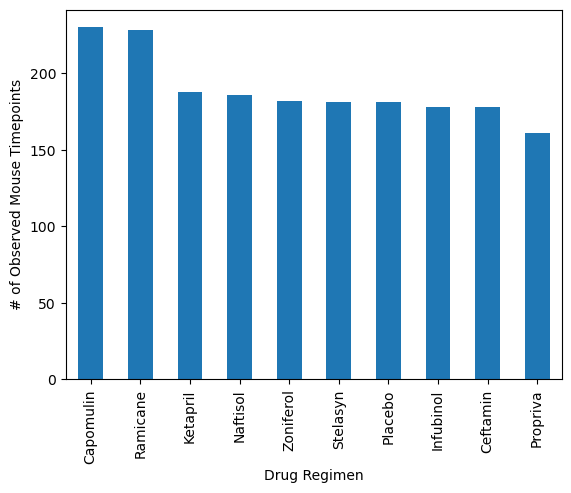

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_and_timepoints = clean_df['Drug Regimen'].value_counts()
mouse_and_timepoints.plot(kind='bar',xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")


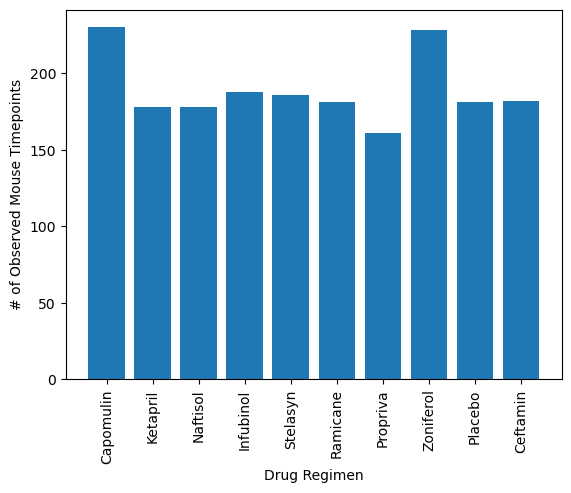

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = clean_df["Drug Regimen"].unique()
y_axis = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
tick_locs = x_axis
plt.bar(x_axis,y_axis)
plt.xticks(tick_locs,rotation=90)
plt.show()


<Axes: ylabel='Sex'>

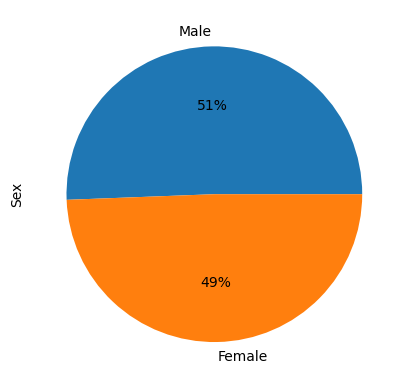

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_and_gender = clean_df['Sex'].value_counts()
mice_and_gender.plot(kind='pie',autopct='%1.0f%%',ylabel="Sex")

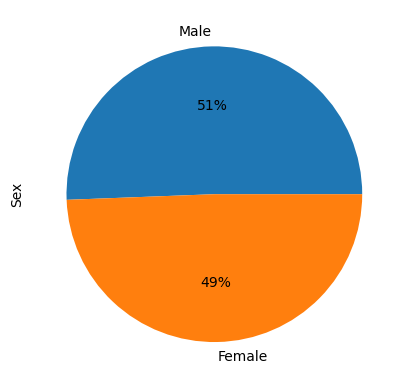

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_and_gender,labels=('Male','Female'),autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_point = clean_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_final_df =  last_point.merge(combined_df, on=(['Mouse ID','Timepoint']),how='left')
tumor_final_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = {'Capomulin':[],
                        'Ramicane':[], 
                        'Infubinol':[], 
                        'Ceftamin':[]}

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_volume = {'Capomulin':[],
                        'Ramicane':[], 
                        'Infubinol':[], 
                        'Ceftamin':[]}

#Loop through treatments
for name in treatments:
    #Loop through Max Timepoint
    for i in tumor_final_df.index:
        #add the tumor volume to the list
        if tumor_final_df.iloc[i]["Drug Regimen"]==name:
            treatments[name].append(tumor_final_df.iloc[i]["Tumor Volume (mm3)"])

#Create a new dataframe 
regimen_vol = pd.DataFrame(treatments)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatments:
    # add subset 
    subset= tumor_final_df[tumor_final_df["Drug Regimen"]==name]
    quartiles = subset["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    #Bounds 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Determine outliers using upper and lower bounds
    print(f"IQR for {name} is: {round(iqr,2)}")
    print(f"Values below {round(lower_bound,2)} for {name} could be outliers.")
    print(f"Values above {round(upper_bound,2)} for {name} could be outliers.")


IQR for Capomulin is: 7.78
Values below 20.7 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
IQR for Ramicane is: 9.1
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
IQR for Infubinol is: 11.48
Values below 36.83 for Infubinol could be outliers.
Values above 82.74 for Infubinol could be outliers.
IQR for Ceftamin is: 15.58
Values below 25.36 for Ceftamin could be outliers.
Values above 87.67 for Ceftamin could be outliers.


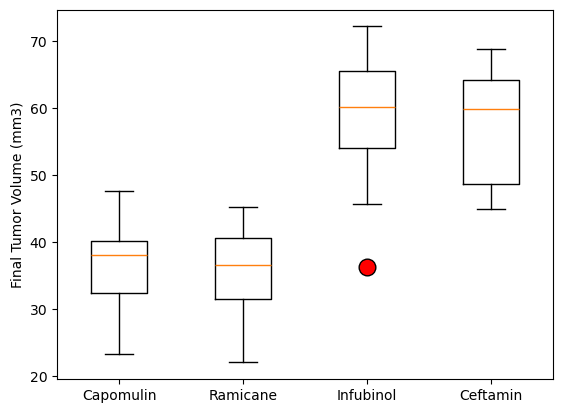

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
format = dict(markerfacecolor = 'red', markersize = 12)
plt.boxplot(regimen_vol, labels = treatments, flierprops=format)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

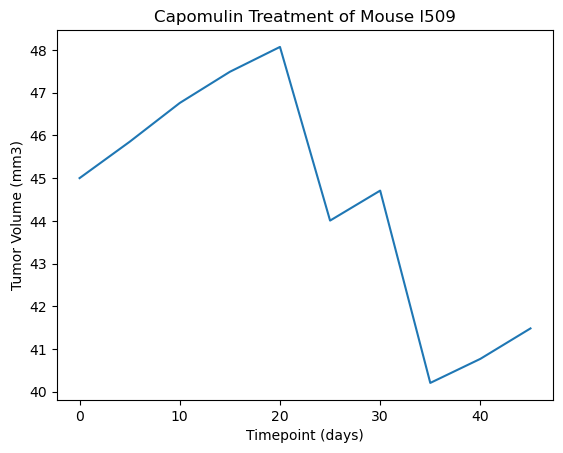

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
vol_and_timepoint = clean_df.loc[clean_df['Mouse ID']=='l509',:]

x_axis = vol_and_timepoint['Timepoint']
y_axis = vol_and_timepoint['Tumor Volume (mm3)']
plt_l509 = plt.plot(x_axis,y_axis)

plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

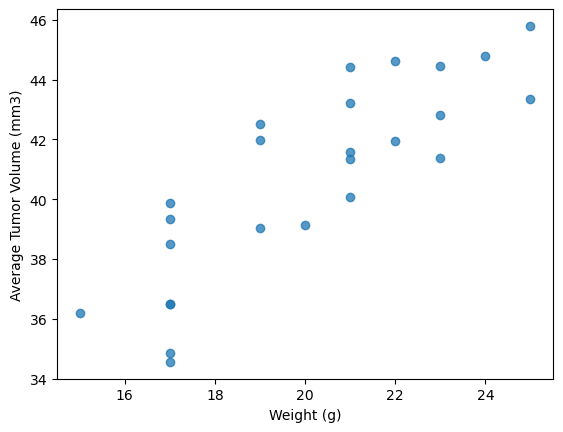

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_and_vol = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
avg_weight_and_vol = weight_and_vol.groupby(['Mouse ID']).mean(numeric_only=True)

plt.scatter(avg_weight_and_vol['Weight (g)'], avg_weight_and_vol['Tumor Volume (mm3)'], marker='o',alpha=.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse wight and the average tumor volume is 0.84


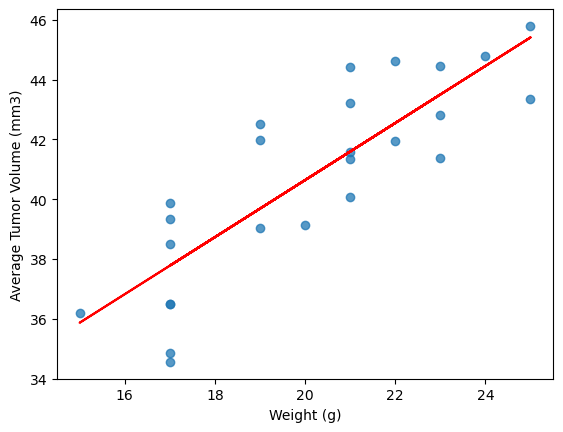

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_co = st.pearsonr(avg_weight_and_vol['Weight (g)'], avg_weight_and_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse wight and the average tumor volume is {round(corr_co[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight_and_vol["Weight (g)"], avg_weight_and_vol["Tumor Volume (mm3)"])
regress_values = avg_weight_and_vol["Weight (g)"] * slope + intercept

plt.scatter(avg_weight_and_vol['Weight (g)'], avg_weight_and_vol['Tumor Volume (mm3)'], marker='o',alpha=.75)
plt.plot(avg_weight_and_vol["Weight (g)"],regress_values,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()